In [200]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [201]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [202]:
data = pd.read_csv("../../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR_better_fixed_fluxes.csv")

In [203]:
# Only selecting data with a classification
data = data[data['Classification'] != 'Radio-loud AGN'] 

In [204]:
data.columns

Index(['RAJ2000', 'DEJ2000', 'Z_BEST', 'SimbadName', 'u_flux_corr',
       'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr',
       'Classification', 'wise_ra', 'wise_dec', 'ch1_flux_corr',
       'ch2_flux_corr', 'tmass_key', 'J_flux_corr', 'H_flux_corr',
       'Ks_flux_corr', 'E_Total_flux', 'E_Peak_flux', 'Total_flux',
       'Peak_flux'],
      dtype='object')

In [205]:
X = data.drop(columns=['RAJ2000', 'DEJ2000', 'SimbadName','Classification', 'wise_ra', 'wise_dec', 
                        'tmass_key', 'E_Total_flux', 'E_Peak_flux'])
y = data[['Classification']]

# Dropping columns with little data (optional)

In [206]:
X = X.drop(columns=['H_flux_corr', 'Ks_flux_corr',
                   'g_flux_corr'])

## Filling nan's

In [207]:
imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X)

## Normalisations

In [198]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_filled = scaler.fit_transform(X_filled)

## Kmeans

In [98]:
n = 8
kmeans = KMeans(n_clusters=n, random_state=0)
kmeans.fit(X_filled)

KMeans(random_state=0)

In [99]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([9070,    1,   10,    3,   34, 3900,  143,    1]))

In [162]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_filled)
    kmeanModel.fit(X_filled)
  
    distortions.append(sum(np.min(cdist(X_filled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_filled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_filled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_filled.shape[0]
    mapping2[k] = kmeanModel.inertia_

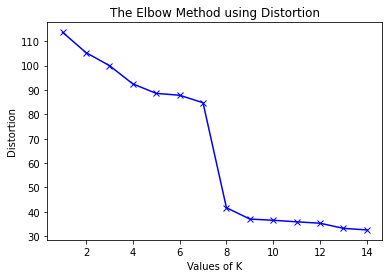

In [84]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [188]:
data['KMeans'] = kmeans.labels_
data.to_csv('Kmeans.csv', index=False)

# Spectral clustering

In [189]:
from sklearn.cluster import SpectralClustering

In [195]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
  
for k in K:
    print(k)
    # Building and fitting the model
    clustering = SpectralClustering(n_clusters=k, n_jobs=8).fit(X_filled)
    clustering.fit(X_filled)
  
    distortions.append(sum(np.min(cdist(X_filled, clustering.cluster_centers_,
                                        'euclidean'), axis=1)) / X_filled.shape[0])
    inertias.append(clustering.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_filled, clustering.cluster_centers_,
                                   'euclidean'), axis=1)) / X_filled.shape[0]
    mapping2[k] = clustering.inertia_

2


/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Software/users/modules/7/software/anaconda3/2021.11/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/lib/condor/execute/dir_289258/ipykernel_289460/2599796972.py", line 12, in <module>
    clustering = SpectralClustering(n_clusters=k, n_jobs=8).fit(X_filled)
  File "/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/cluster/_spectral.py", line 740, in fit
    self.labels_ = spectral_clustering(
  File "/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/cluster/_spectral.py", line 356, in spectral_clustering
    maps = spectral_embedding(
  File "/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py", line 298, in spectral_embedding
    _, diffusion_map = eigsh(
  File "/Software/users/modules/7/software/anaconda3/2021.11/lib/python3.9/site-packages/scipy/sparse/linalg/eigen

TypeError: object of type 'NoneType' has no len()

In [ ]:
clustering = SpectralClustering(n_clusters=2, n_jobs=1, verbose=True).fit(X_filled)
clustering.fit(X_filled)

/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()